# Funding Societies

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

loanDF = pd.read_csv("~\Desktop\Funding Societies\data\loans_fs.csv")

C:\Users\LewisWong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from IPython.display import display

pd.options.display.max_columns = None
loanDF.head()

Unnamed: 0  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0    1296599     5000.0       5000.0           4975.0   36 months   
1           1    1314167     2500.0       2500.0           2500.0   60 months   
2           2    1313524     2400.0       2400.0           2400.0   36 months   
3           3    1277178    10000.0      10000.0          10000.0   36 months   
4           4    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  
0              Computer    860xx         AZ  27.65  
1                  bike    309xx         GA   1.00  
2  real estate business    606xx         IL   8.72  
3              personel    917xx         CA  20.00  
4              Personal    972xx         OR  17.94

Data dictionary of this dataset found from Lending Club official website: https://www.lendingclub.com/info/download-data.action

I will list the not so self-explained variables:
  * **funded_amnt:** The total amount committed to that loan at that point in time.
  * **funded_amnt_inv:** The total amount committed by investors for that loan at that point in time.
  * **term:** The number of payments on the loan. Values are in months and can be either 36 or 60.
  * **installment:** The monthly payment owed by the borrower if the loan originates.
  * **grade:** LC assigned loan grade
  * **sub_grade:** LC assigned loan subgrade
  * **emp_title:** The job title supplied by the Borrower when applying for the loan.*
  * **emp_length:** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
  * **home_ownership:** The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
  * **annual_inc:** The self-reported annual income provided by the borrower during registration.
  * **loan_status:** Current status of the loan
  * **purpose:** A category provided by the borrower for the loan request. 
  * **title:** The loan title provided by the borrower.

## DATA CLEANING ARE BASED ON ASSUMPTIONS! STANDARD PROTOCOL IS TO ASK THE DATA PROVIDER/SOURCES FOR CLARIFICATION BEFORE MAKING ANY CHANGES! THIS IS A CASE STUDY SO ONLY ASSUMPTIONS ARE MADE!

In [3]:
loanDF.describe()

Unnamed: 0     member_id      loan_amnt   funded_amnt  \
count  887379.000000  8.873790e+05  887379.000000  8.873790e+05   
mean   443689.000000  3.500182e+07   15177.429402  1.890163e+04   
std    256164.396598  2.411335e+07   16084.862871  1.115294e+05   
min         0.000000  7.047300e+04  -50000.000000 -2.000000e+05   
25%    221844.500000  1.087713e+07    8000.000000  8.000000e+03   
50%    443689.000000  3.709528e+07   13000.000000  1.290000e+04   
75%    665533.500000  5.847135e+07   20000.000000  2.000000e+04   
max    887378.000000  7.354484e+07  250000.000000  2.500000e+06   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    887379.000000  887379.000000  887379.000000  8.873750e+05   
mean      14702.464383      13.243805     436.717127  8.237809e+04   
std        8442.106732       4.771725     244.186593  1.488763e+05   
min           0.000000       1.000000      15.670000 -5.000000e+04   
25%        8000.000000       9.990000     260.705000  4.500000e+04   
50%       13000.000000      12.990000     382.550000  6.400000e+04   
75%       20000.000000      16.290000     572.600000  9.000000e+04   
max       35000.000000      28.990000    1445.460000  9.500000e+06   

                dti  
count  8.873790e+05  
mean  -8.562732e+03  
std    1.375036e+05  
min   -2.500000e+06  
25%    1.169000e+01  
50%    1.752000e+01  
75%    2.386000e+01  
max    9.999000e+03

Now, since we had a look at the dataset, let's take a deeper look.

In [4]:
print("Percentage of unique 'member ID': ", loanDF['member_id'].nunique()/loanDF['member_id'].count() * 100, "%")
print("Percentage of unique 'Unnamed:0': ", loanDF['Unnamed: 0'].nunique()/loanDF['Unnamed: 0'].count() * 100, "%")

Percentage of unique 'member ID':  100.0 %
Percentage of unique 'Unnamed:0':  100.0 %


Doesn't contribute to the dataset other than being a identifier. **Mark for removal.**

Now, let's remove the redundant information and noisy data.

In [6]:
loanDF.drop('Unnamed: 0', axis=1, inplace=True)
loanDF.drop('member_id', axis=1, inplace=True)
loanDF.drop('emp_title', axis=1, inplace=True)
loanDF.drop('issue_d', axis=1, inplace=True)
loanDF.drop('pymnt_plan', axis=1, inplace=True)
loanDF.drop('url', axis=1, inplace=True)
loanDF.drop('desc', axis=1, inplace=True)
loanDF.drop('title', axis=1, inplace=True)
loanDF.drop('zip_code', axis=1, inplace=True)
loanDF.drop('addr_state', axis=1, inplace=True)

To prevent data overfitting caused by data leakage, **funded_amnt** and **funded_amnt_inv** should be removed as they are data from the future. The model we are trying to create should only use data available when borrower applied for a loan.

In [7]:
loanDF.drop('funded_amnt', axis=1, inplace=True)
loanDF.drop('funded_amnt_inv', axis=1, inplace=True)

In [8]:
loanDF.head()

loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0     5000.0   36 months     10.65       162.87     B        B2  10+ years   
1     2500.0   60 months     15.27        59.83     C        C4   < 1 year   
2     2400.0   36 months     15.96        84.33     C        C5  10+ years   
3    10000.0   36 months     13.49       339.31     C        C1  10+ years   
4     3000.0   60 months     12.69        67.79     B        B5     1 year   

  home_ownership  annual_inc verification_status  loan_status         purpose  \
0           RENT     24000.0            Verified   Fully Paid     credit_card   
1           RENT     30000.0     Source Verified  Charged Off             car   
2           RENT     12252.0        Not Verified   Fully Paid  small_business   
3           RENT     49200.0     Source Verified   Fully Paid           other   
4           RENT     80000.0     Source Verified      Current           other   

     dti  
0  27.65  
1   1.00  
2   8.72  
3  20.00  
4  17.94

Taking a look at our target variable

In [9]:
loanDF['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Description of status can be found at: https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-

The status **Issued** and **Current** should be removed as they have not reached maturity yet and therefore do not determine a borrower's creditworthiness.

Other than **Charged Off**, the other late payment should be removed as only **Fully Paid** and **Charged Off** describe the final outcome. Although **Default** resembles **Charged Off**, loans that are charged off basically have no hope of being repaid while defaulted loans still have small chance. Differences between **Default** and **Charged Off** by LendingClub can be read here: https://help.lendingclub.com/hc/en-us/articles/216127747

In [10]:
loanDF = loanDF[~(loanDF['loan_status'] == "Current")]
loanDF = loanDF[~(loanDF['loan_status'] == "Issued")]
loanDF = loanDF[~(loanDF['loan_status'] == "Late (31-120 days)")]
loanDF = loanDF[~(loanDF['loan_status'] == "Late (16-30 days)")]
loanDF = loanDF[~(loanDF['loan_status'] == "In Grace Period")]
loanDF = loanDF[~(loanDF['loan_status'] == "Default")]
loanDF['loan_status'].value_counts()

Fully Paid                                             207723
Charged Off                                             45248
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

From the post in this forum:https://forum.lendacademy.com/?topic=2427.msg20813#msg20813

**"Does not meet the credit policy"** means the credit policy was updated after this loan was listed but before it issued. Credit policy changes all the time so I believe this can be ignored.

In [11]:
loanDF['loan_status'] = loanDF['loan_status'].replace({'Does not meet the credit policy. Status:Fully Paid':'Fully Paid',
                                                      'Does not meet the credit policy. Status:Charged Off':'Charged Off'})
loanDF['loan_status'].value_counts()

Fully Paid     209711
Charged Off     46009
Name: loan_status, dtype: int64

In [12]:
loanDF['loan_status'] = loanDF['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
loanDF['loan_status'].value_counts()

1    209711
0     46009
Name: loan_status, dtype: int64

Check for null values.

In [13]:
loanDF.isnull().any()

loan_amnt              False
term                   False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length              True
home_ownership         False
annual_inc              True
verification_status    False
loan_status            False
purpose                False
dti                    False
dtype: bool

Let's investigate emp_length and annual_inc for null values.

In [14]:
loanDF[loanDF['emp_length'].isnull()]

loan_amnt        term  int_rate  installment grade sub_grade  \
168        2500.0   36 months      7.51        77.78     A        A3   
323       18000.0   60 months     17.58       452.98     D        D4   
394        4000.0   36 months     11.71       132.31     B        B3   
422        1000.0   36 months     14.65        34.50     C        C3   
439        8250.0   36 months      7.51       256.67     A        A3   
534        1700.0   36 months      7.90        53.20     A        A4   
555        5000.0   36 months      8.90       158.77     A        A5   
562        3000.0   36 months      9.91        96.68     B        B1   
569        8575.0   36 months     17.58       308.21     D        D4   
680        5600.0   36 months      6.03       170.44     A        A1   
752       14125.0   36 months     12.42       472.00     B        B4   
902        2250.0   36 months     15.27        78.30     C        C4   
975        7000.0   36 months      6.62       214.93     A        A2   
985       15000.0   36 months     12.42       501.23     B        B4   
1090      12000.0   36 months      6.03       365.23     A        A1   
1093      15000.0   36 months     17.27       536.81     D        D3   
1123       8500.0   36 months     15.96       298.67     C        C5   
1140       5000.0   36 months     25.40       155.56     A        A3   
1149       4000.0   36 months     15.27       139.20     C        C4   
1160       5000.0   36 months     14.65       172.48     C        C3   
1228       5000.0   36 months      7.90       156.46     A        A4   
1259       1400.0   36 months      8.90        44.46     A        A5   
1282       9250.0   36 months     10.65       301.31     B        B2   
1314       7200.0   36 months     12.69       241.53     B        B5   
1329       5325.0   36 months     12.42       177.94     B        B4   
1340      12000.0   36 months      7.51       373.33     A        A3   
1404       8000.0   36 months      9.91       257.80     B        B1   
1410      10000.0   36 months      6.03       304.36     A        A1   
1428      15000.0   36 months     17.58       539.14     D        D4   
1431       2125.0   36 months      8.90        67.48     A        A5   
...           ...         ...       ...          ...   ...       ...   
882580    10000.0   36 months     12.39       334.01     C        C1   
882630     4000.0   36 months     14.99       138.65     C        C5   
882805     7175.0   36 months     17.86       258.89     D        D5   
882952    10000.0   36 months     14.31       343.29     C        C4   
883083     7500.0  600 months     23.99       294.21     F        F2   
883187    15650.0   60 months     15.99       380.50     D        D2   
883318     5000.0   36 months     14.31       171.65     C        C4   
883330     5000.0   36 months      8.19       157.13     A        A5   
883396    17000.0   60 months     14.31       398.30     C        C4   
883475     9450.0   36 months     12.99       318.37     C        C2   
883795     3500.0   36 months      8.67       110.77     B        B1   
883850     1000.0   36 months     15.99        35.16     D        D2   
883926    15000.0   36 months     15.59       524.33     D        D1   
883960     9000.0   36 months     12.99       303.21     C        C2   
883992     5000.0   36 months     11.44       164.74     B        B4   
884053     9250.0   36 months     21.99       353.22     E        E5   
884500     2500.0   36 months     20.99        94.18     E        E4   
884504    24000.0   60 months     13.66       554.22     C        C3   
884623     7200.0   36 months     12.39       240.49     C        C1   
885033     5950.0   36 months     17.86       214.69     D        D5   
885065    12000.0   36 months     13.66       408.16     C        C3   
885327     5000.0   36 months     15.59       174.78     D        D1   
885633     6000.0   36 months     14.99       207.97     C        C5   
885863    30000.0   60 months     21.99       82

In [15]:
print("Percentage of null values: ",len(loanDF[loanDF['emp_length'].isnull()])/len(loanDF)*100, "%")

Percentage of null values:  3.8835445017988426 %


4% is quite alot, let's take a deeper look

In [16]:
temp = loanDF[loanDF['emp_length'].isnull()]
display(temp[temp['loan_status']==0])

loan_amnt        term  int_rate  installment grade sub_grade  \
168        2500.0   36 months      7.51        77.78     A        A3   
422        1000.0   36 months     14.65        34.50     C        C3   
534        1700.0   36 months      7.90        53.20     A        A4   
569        8575.0   36 months     17.58       308.21     D        D4   
752       14125.0   36 months     12.42       472.00     B        B4   
1123       8500.0   36 months     15.96       298.67     C        C5   
1140       5000.0   36 months     25.40       155.56     A        A3   
1149       4000.0   36 months     15.27       139.20     C        C4   
1259       1400.0   36 months      8.90        44.46     A        A5   
1329       5325.0   36 months     12.42       177.94     B        B4   
1404       8000.0   36 months      9.91       257.80     B        B1   
1525      23000.0   60 months     19.91       608.21     E        E4   
1627      24000.0   60 months      1.30       653.07     F        F2   
1784       5000.0   60 months     16.77       123.65     D        D2   
1832       3200.0   36 months      7.90       100.13     A        A4   
2097       7000.0   36 months      9.91       225.58     B        B1   
2503       3200.0   60 months      9.91        67.85     B        B1   
2743       8000.0   60 months     17.58       201.33     D        D4   
2786       8000.0   36 months     10.65       260.59     B        B2   
2815      10000.0   36 months     12.69       335.45     B        B5   
2987       3000.0   36 months     12.69       100.64     B        B5   
3055      35000.0   36 months     18.25      1269.73     D        D5   
3061      16000.0   36 months     12.42       534.65     B        B4   
3101       5000.0   36 months      7.90       156.46     A        A4   
3263       2700.0   36 months     11.71        89.31     B        B3   
3307       5000.0   36 months      9.91       161.13     B        B1   
3489       2000.0   36 months     12.69        67.09     B        B5   
3616      12000.0   60 months     18.25       306.36     D        D5   
3646       6000.0   36 months      6.62       184.23     A        A2   
3689       3825.0   36 months     17.27       136.89     D        D3   
...           ...         ...       ...          ...   ...       ...   
870548     9975.0   36 months     14.99       345.74     C        C5   
871035     7375.0   36 months     19.99       274.05     E        E3   
871038    16700.0   36 months      1.30       659.59     F        F3   
872022     6600.0   36 months     13.66       224.49     C        C3   
872193     8000.0   36 months      9.49       256.23     B        B2   
872997    16000.0   36 months     11.99       531.36     B        B5   
873386     7400.0   36 months     18.54       269.54     E        E1   
874481    20000.0   60 months      8.67       411.98     B        B1   
874851     7825.0   36 months     11.44       257.82     B        B4   
874853    15000.0   36 months      9.49       480.43     B        B2   
874857    19150.0   60 months     19.24       499.30     E        E2   
875299     6200.0   36 months     16.49       219.48     D        D3   
875951    12500.0   60 months     15.99       303.91     D        D2   
876521    18425.0   60 months     19.99       488.05     E        E3   
877623     9600.0   36 months     16.49       339.84     D        D3   
879132     6425.0   36 months     15.99       225.86     D        D2   
880798     7000.0   36 months      9.49       224.20     B        B2   
881529    13100.0   60 months     21.99       361.74     E        E5   
881750    25000.0   60 months      8.67       514.97     B        B1   
882952    10000.0   36 months     14.31       343.29     C        C4   
883083     7500.0  600 months     23.99       294.21     F        F2   
883475     9450.0   36 months     12.99       318.37     C        C2   
883992     5000.0   36 months     11.44       164.74     B        B4   
884053     9250.0   36 months     21.99       35

In [17]:
perc = len((temp[temp['loan_status']!=1]))/len(loanDF[loanDF['emp_length'].isnull()])*100
print("Percentage of bad loan with null emp_length: ", perc,"%")

Percentage of bad loan with null emp_length:  25.57647769610311 %


It seems bad if we just remove them outright, let's replace the null values with new value - **-1**.
But before that, let's see the data structure of emp_length.

In [18]:
loanDF['emp_length'].value_counts()

10+ years    77351
2 years      23910
< 1 year     21358
3 years      20646
5 years      18231
1 year       17204
4 years      16402
6 years      14897
7 years      14185
8 years      11956
9 years       9649
Name: emp_length, dtype: int64

Transform all of them to numerics.

In [19]:
loanDF['emp_length'] = loanDF['emp_length'].replace({'10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7, '6 years': 6,
                                                     '5 years': 5, '4 years': 4, '3 years': 3, '2 years': 2, '1 year': 1,
                                                      '< 1 year': 0, np.nan: -1})
loanDF['emp_length'].value_counts()

 10    77351
 2     23910
 0     21358
 3     20646
 5     18231
 1     17204
 4     16402
 6     14897
 7     14185
 8     11956
-1      9931
 9      9649
Name: emp_length, dtype: int64

In [20]:
loanDF[loanDF['annual_inc'].isnull()]

loan_amnt        term  int_rate  installment grade sub_grade  \
42449     5000.0   36 months      7.43       155.38     A        A2   
42450     7000.0   36 months      7.75       218.55     A        A3   
42480     6700.0   36 months      7.75       209.18     A        A3   
42533     6500.0   36 months      8.38       204.84     A        A5   

       emp_length home_ownership  annual_inc verification_status  loan_status  \
42449           0           NONE         NaN        Not Verified            1   
42450           0           NONE         NaN        Not Verified            1   
42480           0           NONE         NaN        Not Verified            1   
42533           0           NONE         NaN        Not Verified            1   

      purpose  dti  
42449   other  1.0  
42450   other  1.0  
42480   other  1.0  
42533   other  4.0

In [21]:
len(loanDF[loanDF['annual_inc'].isnull()])

4

Only 4 null rows, no harm in removing it.

In [22]:
loanDF = loanDF.dropna()
loanDF.isnull().any()

loan_amnt              False
term                   False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
verification_status    False
loan_status            False
purpose                False
dti                    False
dtype: bool

Check for other dtype if it is suitable

In [23]:
loanDF.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length               int64
home_ownership          object
annual_inc             float64
verification_status     object
loan_status              int64
purpose                 object
dti                    float64
dtype: object

In [24]:
loanDF['term'].value_counts()

 36 months    198039
 60 months     56181
600 months      1496
Name: term, dtype: int64

It is likely a typo for 600 months because the data dictionary mentioned:
  * **term:** The number of payments on the loan. Values are in months and can be either 36 or 60.

I should replace 600 as 60 months and make them to binary instead.

In [25]:
loanDF['term'] = loanDF['term'].replace({' 36 months': 0,' 60 months': 1, '600 months': 1})
loanDF['term'].value_counts()

0    198039
1     57677
Name: term, dtype: int64

In [26]:
loanDF['term'].value_counts()

0    198039
1     57677
Name: term, dtype: int64

On further research, it is found that Grade and Subgrade can be derived from interest rate, so they are redundant and should be removed. We chose interest rate over grading because continuous variables is more suitable for machine learning.
https://www.lendingclub.com/foliofn/rateDetail.action

In [27]:
loanDF.drop('grade', axis=1, inplace=True)
loanDF.drop('sub_grade', axis=1, inplace=True)
loanDF.head()

loan_amnt  term  int_rate  installment  emp_length home_ownership  \
0     5000.0     0     10.65       162.87          10           RENT   
1     2500.0     1     15.27        59.83           0           RENT   
2     2400.0     0     15.96        84.33          10           RENT   
3    10000.0     0     13.49       339.31          10           RENT   
5     5000.0     0      7.90       156.46           3           RENT   

   annual_inc verification_status  loan_status         purpose    dti  
0     24000.0            Verified            1     credit_card  27.65  
1     30000.0     Source Verified            0             car   1.00  
2     12252.0        Not Verified            1  small_business   8.72  
3     49200.0     Source Verified            1           other  20.00  
5     36000.0     Source Verified            1         wedding  11.20

Continue transformating data...

In [28]:
loanDF['home_ownership'].value_counts()

MORTGAGE    126100
RENT        107220
OWN          22172
OTHER          179
NONE            44
ANY              1
Name: home_ownership, dtype: int64

According to the data dictionary:
  * **home_ownership:** The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

So the NONE and ANY should be removed to reduce overfitting as it is noisy data.

In [29]:
loanDF = loanDF[~(loanDF['home_ownership'] == "NONE")]
loanDF = loanDF[~(loanDF['home_ownership'] == "ANY")]

loanDF['home_ownership'].value_counts()

MORTGAGE    126100
RENT        107220
OWN          22172
OTHER          179
Name: home_ownership, dtype: int64

In [30]:
loanDF['home_ownership'] = loanDF['home_ownership'].replace({'MORTGAGE': 0,'RENT': 1, 'OWN': 2, 'OTHER' : 3})

loanDF['home_ownership'].value_counts()

0    126100
1    107220
2     22172
3       179
Name: home_ownership, dtype: int64

In [31]:
loanDF['verification_status'].value_counts()

Verified           93502
Not Verified       87873
Source Verified    74296
Name: verification_status, dtype: int64

In [32]:
loanDF['verification_status'] = loanDF['verification_status'].replace({'Verified': 0,'Not Verified': 1, 'Source Verified': 2})

loanDF['verification_status'].value_counts()

0    93502
1    87873
2    74296
Name: verification_status, dtype: int64

In [33]:
loanDF['purpose'].value_counts()

debt_consolidation    149450
credit_card            50390
home_improvement       15140
other                  14694
major_purchase          6388
small_business          4907
car                     3710
medical                 2912
moving                  2074
wedding                 2011
house                   1696
vacation                1607
educational              422
renewable_energy         270
Name: purpose, dtype: int64

In [34]:
loanDF['purpose'] = loanDF['purpose'].replace({'debt_consolidation': 0,'credit_card': 1, 'home_improvement': 2,
                                              'other': 3,'major_purchase': 4, 'small_business': 5,
                                              'car': 6,'medical': 7, 'moving': 8,
                                              'wedding': 9,'house': 10, 'vacation': 11,
                                              'educational': 12,'renewable_energy': 13})
loanDF['purpose'].value_counts()

0     149450
1      50390
2      15140
3      14694
4       6388
5       4907
6       3710
7       2912
8       2074
9       2011
10      1696
11      1607
12       422
13       270
Name: purpose, dtype: int64

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=loanDF['loan_amnt'])

It seems to have negative loan_amnt, might be typo. Let's fix that first.

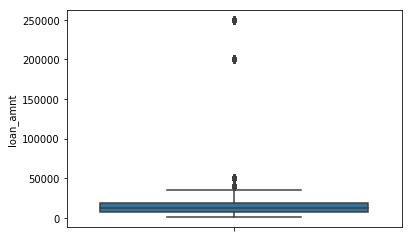

In [36]:
loanDF['loan_amnt'] = abs(loanDF['loan_amnt'])

sns.boxplot(y=loanDF['loan_amnt'])

According to LendingClub official website: https://help.lendingclub.com/hc/en-us/articles/213706198-Amounts-for-personal-loans,
it seems that maximum loan is only $40,000. So we can assume that anything more than that must be a mistake made during data entry and the last digit 0 should be removed.

In [37]:
Q1 = loanDF['loan_amnt'].quantile(0.25)
Q3 = loanDF['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

temp = loanDF[(loanDF['loan_amnt'] > (Q3+1.5*IQR))]
display(temp)

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
457       40000.0     0      6.03       243.49          10               0   
514      250000.0     0     12.42       710.08           5               1   
552      250000.0     0     14.65       758.88           0               1   
598      200000.0     1     19.42       560.09           3               1   
794       40000.0     0     11.71       297.69           7               0   
814       40000.0     0     16.77       355.39           4               1   
846       50000.0     0      6.62       982.52           2               1   
874      200000.0     0      8.90       381.04          10               1   
951       50000.0     0     12.42       467.82           4               0   
1133     200000.0     0     17.27       465.24           6               1   
1134     250000.0     0      6.62       442.14           4               1   
1291      40000.0     1     17.27       569.96           8               1   
1306     200000.0     0     11.71       199.29           0               1   
1402      50000.0     0     15.96        90.48           0               1   
1476      40000.0     1     12.69       254.20          10               1   
1517     250000.0     0     16.29       114.73           6               1   
1711      40000.0     1     17.58       480.04           8               1   
1786      40000.0     1     17.58       352.32           4               1   
1810      50000.0     0      6.03       182.62          10               0   
2040      50000.0     0     12.42        50.13           0               1   
2325     200000.0     0      8.90       247.68          10               0   
2581      50000.0     0      7.51       217.78           7               1   
2602     200000.0     1     20.30       319.94           5               0   
3051     250000.0     1     17.27       144.99           6               0   
3148      50000.0     1     18.25       584.63          10               1   
3200     250000.0     1     17.27       874.93           9               0   
3399     250000.0     0     11.71       231.54          10               0   
3660     200000.0     0     18.25       544.17           5               1   
3855      40000.0     1     10.65       431.37           2               0   
3983     200000.0     0      6.03       228.27           1               1   
...           ...   ...       ...          ...         ...             ...   
861149    40000.0     0      6.03       456.54           5               1   
862791    50000.0     0      6.03       456.54          10               0   
864142    40000.0     1     14.99       332.99          10               1   
864369    50000.0     0      6.03       547.84           0               0   
864919   250000.0     1     15.59       271.14          10               0   
865000   200000.0     0      9.49       368.33          10               0   
865356   200000.0     0     12.99        33.69          -1               1   
866788    50000.0     0      6.03       486.97           3               1   
867031    40000.0     0     13.66       510.20          10               0   
869666    50000.0     0     18.54       965.24           1               0   
870111    50000.0     1      8.67       411.98          10               1   
870668    40000.0     0     12.99      1179.12           2               0   
872955   250000.0     0      7.49       559.83           1               0   
873999    40000.0     0     19.24       262.96           0               1   
875182    40000.0     0     11.44       658.95           2               0   
875742   200000.0     0     17.14       442.07           0               1   
876622    50000.0     0     14.31       480.60          10               1   
876708   200000.0     1     19.99       927.10          10               1   
877127    50000.0     0     18.54       145.70           1               1   
877595   250000.0     0     14

But upon closer look, DTI is weird here. According to https://www.lendingclub.com/loans/resource-center/calculating-debt-to-income, anything over 40% DTI ratio and your loan application will likely be denied. Let's take a look at the boxplot where the loan_amnt is the outlier.

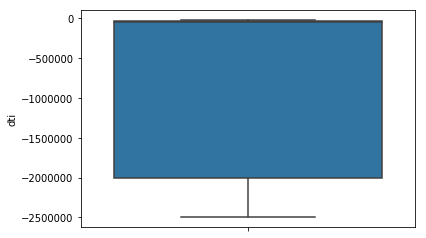

In [38]:
sns.boxplot(y=temp['dti'])

In [39]:
temp.sort_values(by=['dti'], ascending=False)

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
457       40000.0     0      6.03       243.49          10               0   
78481    200000.0     1      1.20       187.30           5               1   
89220    250000.0     0     17.76       432.39           1               1   
270516   200000.0     0      9.17       446.31          10               1   
278085    40000.0     1     18.24       357.34          10               0   
85376     40000.0     0     19.20       532.98          10               1   
288425   200000.0     0     18.99       277.64          10               1   
291693   250000.0     1     10.99       434.75           2               1   
295254    40000.0     1     22.15       335.92          10               0   
300422    50000.0     1     12.99       252.51          10               0   
304518   250000.0     1     14.49       339.91           2               1   
80066    200000.0     0     20.20       651.22          10               2   
78972     50000.0     0     17.10       216.90          10               1   
309669    50000.0     0     10.99       294.61          10               1   
89698    200000.0     1     11.99       533.75           1               0   
310720    40000.0     0     18.24       616.64           1               1   
76878    250000.0     1     17.76       459.79           0               1   
313560   200000.0     0     11.67       826.43           4               1   
74480    200000.0     1     17.10       749.06           0               0   
320996    50000.0     1     18.24       497.73           3               0   
324301    50000.0     1     25.99       339.01          10               0   
325192   200000.0     0     16.29        88.26           4               1   
325905   250000.0     1     22.15       290.90           8               2   
329625   200000.0     1     16.29       367.09          10               0   
72311     40000.0     1     25.40       478.05           3               0   
329881    40000.0     0     14.49       172.09           3               0   
258843    50000.0     0     11.44       622.71          10               1   
89785    250000.0     0     11.99        99.63           0               1   
331531   250000.0     0     15.61      1223.77           2               0   
224570    50000.0     0      7.62        99.72           1               0   
...           ...   ...       ...          ...         ...             ...   
92252    200000.0     0      9.71       269.91           0               0   
90249    250000.0     1     18.55       822.20          10               0   
37111     50000.0     0     15.05       346.92           5               1   
252967   250000.0     1     14.99       570.84          10               1   
424365   250000.0     0     12.99       539.03           1               1   
435455    40000.0     0      7.62       405.10           2               2   
226940    50000.0     0     17.58       359.43           4               1   
226868    40000.0     0      8.90       355.64           3               1   
441803    40000.0     1     16.59       369.49           2               1   
106503    40000.0     0      8.90       417.56          10               0   
30483     40000.0     0     13.11       168.73           4               1   
30884    250000.0     0     13.85       682.08           8               1   
104891    40000.0     0     19.52       138.45           7               0   
32038    200000.0     0      1.00       818.50           0               1   
32419    250000.0     0     13.85       818.50           7               1   
443152    40000.0     1     11.99       266.88           0               0   
443137   250000.0     0     18.92       183.08          10               0   
32480    250000.0     0     13.11       330.70          -1               1   
32513     50000.0     0     10.99       549.95           2               1   
33390     40000.0     0     15

The smallest dti is -20000% and I don't think that is a mistake. I have no way of calculating the DTI of the borrowers as I don't have their monthly debt payments data. So it should be removed.

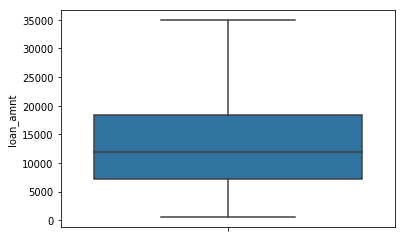

In [40]:
Q1 = loanDF['loan_amnt'].quantile(0.25)
Q3 = loanDF['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

loanDF = loanDF[~((loanDF['loan_amnt'] <(Q1-1.5*IQR)) | (loanDF['loan_amnt'] > (Q3+1.5*IQR)))]

sns.boxplot(y=loanDF['loan_amnt'])

In [41]:
temp = loanDF[(loanDF['loan_amnt'] > (Q3+1.5*IQR))]
display(temp)

Empty DataFrame
Columns: [loan_amnt, term, int_rate, installment, emp_length, home_ownership, annual_inc, verification_status, loan_status, purpose, dti]
Index: []

Looks fine now, continue on.

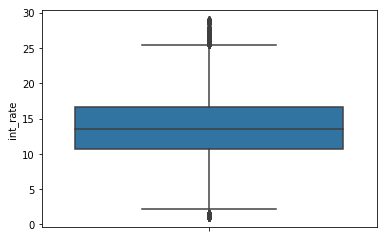

In [42]:
sns.boxplot(y=loanDF['int_rate'])

The interest rate looks fine.

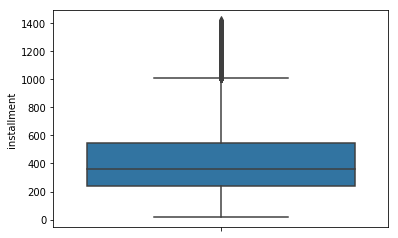

In [43]:
sns.boxplot(y=loanDF['installment'])

In [44]:
loanDF.sort_values(by=['installment'],ascending=False)

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
735822    35000.0     0     26.77      1424.57           8               1   
761035    35000.0     0     25.99      1409.99           9               0   
61662     35000.0     0     25.89      1408.13          10               0   
460595    35000.0     0     25.89      1408.13           6               1   
263963    35000.0     0     25.83      1407.01          10               1   
423448    35000.0     0     25.83      1407.01          10               1   
47380     35000.0     0     25.83      1407.01          10               2   
66421     35000.0     0     25.80      1406.45           5               1   
357911    35000.0     0     25.80      1406.45          10               1   
42739     35000.0     0     25.80      1406.45           0               1   
48566     35000.0     0     25.80      1406.45           2               0   
324768    35000.0     0     25.80      1406.45           3               0   
353617    34875.0     0     25.99      1404.95           9               0   
66211     35000.0     0     25.57      1402.17           5               0   
56607     35000.0     0      1.30      1402.17          10               1   
98336     35000.0     0     25.28      1396.79          10               0   
53141     35000.0     0     24.99      1391.41          10               0   
128544    35000.0     0     24.83      1388.45          10               0   
203878    35000.0     0     24.83      1388.45          10               2   
431564    35000.0     0      3.20      1382.36           3               0   
207035    34775.0     0     24.89      1380.63           7               0   
221581    35000.0     0     24.33      1379.23           3               0   
82445     35000.0     0     24.08      1374.63           3               2   
121698    35000.0     0     24.08      1374.63          10               1   
88858     35000.0     0      1.50      1374.63          10               1   
462706    35000.0     0      1.20      1374.63           7               0   
754803    35000.0     0      1.30      1372.97           0               1   
837879    35000.0     0      1.20      1372.97          10               1   
426615    34100.0     0     25.83      1370.83           2               1   
144188    35000.0     0     23.76      1368.75          -1               0   
...           ...   ...       ...          ...         ...             ...   
25471      1000.0     1     13.98        23.26           6               1   
42346       700.0     0     11.86        23.21           7               2   
18882      1000.0     1     13.80        23.17           3               1   
14298      1000.0     1      2.20        23.01          -1               1   
22479      1000.0     1     13.35        22.94           2               0   
16890      1000.0     1     13.06        22.79           1               1   
38936       725.0     0      7.37        22.51           1               1   
27694      1000.0     1     11.12        21.81           2               0   
220076     1000.0     1     10.74        21.62           4               1   
41718       600.0     0     17.66        21.59           1               3   
19785      1000.0     1     10.00        21.25           7               0   
42216       600.0     0     14.07        20.53           0               1   
41822       600.0     0     13.24        20.29          10               1   
41954       600.0     0     13.24        20.29           3               1   
27363      1000.0     1      7.88        20.22           5               0   
29682      1000.0     1      7.14        19.87           1               1   
42283       600.0     0     11.54        19.80           0               1   
42197       600.0     0     10.91        19.62           1               1   
42066       550.0     0     12.04        18.28           1               1   
42136       500.0     0     12

Looks fine as well, higher loan higher installment.

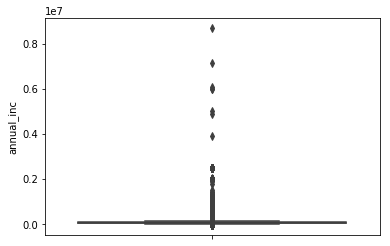

In [45]:
sns.boxplot(y=loanDF['annual_inc'])

In [46]:
loanDF.sort_values(by=['annual_inc'],ascending=False)

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
866973     8000.0     0     13.66       272.11          10               0   
177182    14825.0     0     13.11       500.30          10               0   
169235    30000.0     0     12.12       998.15          10               0   
30176      5000.0     0     12.73       167.84          10               0   
675609     4475.0     0      7.89       140.01          10               0   
180080    35000.0     0     15.31      1218.61          10               0   
306811    15600.0     0      7.69       486.62           8               0   
29708     25000.0     1     10.62       334.08           3               0   
257511    30000.0     0     15.59       349.55           3               0   
421884    20000.0     0     14.16       670.55           3               1   
441571    20000.0     0     14.64       185.38          10               0   
37878     30000.0     0     10.95       245.36           9               0   
836747    30000.0     1     24.50      1017.07           5               1   
347880    20000.0     0     10.99      1145.69           7               0   
63373     20000.0     0     13.67       850.44           5               0   
801107    30000.0     1     10.99       313.02           1               0   
128249    20000.0     0     14.33       618.09          10               0   
155517    20000.0     0     15.80        70.12          -1               2   
36715     30000.0     0     11.58       528.22           0               0   
212276    30000.0     0      7.90       485.00           8               0   
4007      20000.0     0      8.90       444.55           5               0   
456858    30000.0     0      7.62       311.62           7               1   
20919     30000.0     1     16.69       617.16          10               0   
281375    30000.0     0      2.20       184.51          10               1   
180815    20000.0     0      8.90       317.54          10               0   
439222    20000.0     0      8.90       342.94           7               1   
70331     20000.0     0      8.90       222.28           5               1   
42196     30000.0     0     11.54        49.50           0               2   
54875     20000.0     0      9.67       269.75           8               1   
164806    30000.0     0     12.12       239.56          10               1   
...           ...   ...       ...          ...         ...             ...   
116004    20000.0     0      9.71       462.69           2               1   
771816    30000.0     1     16.99       377.06           0               1   
419894    20000.0     0     22.45       192.12           0               1   
45375     20000.0     1      3.20       857.83           2               1   
252117    30000.0     1     11.44       329.44           0               0   
54001     20000.0     0     12.99       363.85           0               2   
195319    20000.0     0     12.12       370.98           5               1   
188328    30000.0     0     12.12       211.28          10               0   
225549    20000.0     0     13.11       337.47           4               1   
26181     30000.0     1     10.75       163.76           2               1   
71565     20000.0     0     10.99       392.81          10               0   
109940    20000.0     0     17.56       100.61           7               2   
143382    20000.0     0     12.12        66.55           0               0   
223427    30000.0     0     10.74       326.16           5               0   
109992    20000.0     0      9.71       257.05           7               0   
4015      20000.0     1     22.06       608.37          10               0   
148167    30000.0     0     11.14       656.11           2               0   
196685    20000.0     0     12.12       382.63           4               1   
62054     20000.0     1     21.00       389.57          10               0   
225635    20000.0     0      1

It seems like i should remove the DTI outlier first. Will come back to here later.

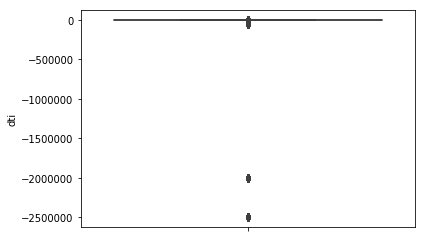

In [47]:
sns.boxplot(y=loanDF['dti'])

In [48]:
Q1 = loanDF['dti'].quantile(0.25)
Q3 = loanDF['dti'].quantile(0.75)
IQR = Q3 - Q1

temp = loanDF[((loanDF['dti'] <(Q1-1.5*IQR)) | (loanDF['dti'] > (Q3+1.5*IQR)))]

temp.sort_values(by=['dti'],ascending=False)

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
499240     4000.0     0     18.20       145.02           0               1   
311051     3600.0     0     18.99       131.95           7               2   
296562     9000.0     0     16.29       317.71          10               0   
243271    17875.0     1     18.54       459.18          10               0   
294538     4500.0     0     20.99       169.52           7               2   
754477    35000.0     1     21.67       960.11           8               0   
719494     4950.0     0     19.99       183.94          -1               0   
238984     8000.0     0     14.31       274.63          10               0   
768491    17000.0     0     16.99       606.02           3               1   
276688    33575.0     1     24.50       975.66          10               1   
862395     4950.0     0      1.00       166.77           6               0   
865776    12000.0     1     17.14       299.14           0               2   
278585    25000.0     0      8.39       787.92          10               0   
840783    20000.0     1     10.99       434.75           2               1   
820237    18000.0     1     16.99       447.25           4               0   
876016    21000.0     1     15.99       510.57          10               0   
716607    11300.0     0     17.57       406.09           7               0   
619371     1200.0     0     18.25        43.54           8               1   
263742    15500.0     0     14.49       533.45          -1               1   
726914     8000.0     0     12.29       266.83          10               2   
329030    13525.0     0     10.15       437.37           5               0   
282862    20800.0     1     15.61       501.52           2               1   
814762     4725.0     0     17.57       169.81           8               1   
261196     5000.0     0     19.99       185.80           4               1   
868457     7200.0     0     15.99       253.10          10               0   
234122    14975.0     1     24.99       439.45           4               1   
859780     8000.0     0     14.99       277.29          10               0   
302932    13250.0     1     24.50       385.04           4               1   
297060     5000.0     0     12.49       167.25          10               1   
295872     7700.0     0      9.17       245.47           0               1   
...           ...   ...       ...          ...         ...             ...   
229690    20000.0     0     15.27       417.58           5               2   
24080     30000.0     1     10.36       343.33           2               1   
23585     30000.0     0     15.95       535.77           6               1   
352734    30000.0     0     15.61       194.93          -1               0   
112105    30000.0     1     22.20       731.46           8               0   
387901    30000.0     0     15.61       489.51           7               0   
396116    20000.0     0     12.99       336.90          10               0   
107900    20000.0     0     13.05       225.92           3               2   
240476    20000.0     1     11.44       329.44           3               1   
751167    30000.0     1     19.52       786.83           5               0   
751252    20000.0     0     10.99       441.91           5               1   
408268    30000.0     0     12.49       247.53          10               0   
43362     30000.0     0     13.98       546.69           1               0   
102211    30000.0     0     10.64       195.42           2               1   
41596     20000.0     0      8.63       126.52           6               1   
406676    30000.0     1     18.25       893.54           3               0   
235859    20000.0     1     15.59       602.52           5               0   
39364     30000.0     0      9.83       257.50           3               0   
39194     30000.0     0     11.66       330.53           0               2   
39120     30000.0     0      8

Outliers beyond upper outer fence seems ok. Let's just remove below lower fence's outliers.

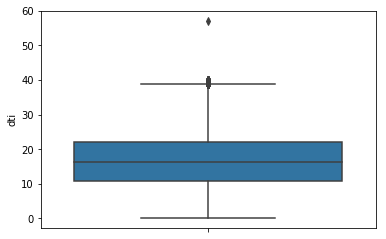

In [49]:
loanDF = loanDF[~((loanDF['dti'] <(Q1-1.5*IQR)))]
sns.boxplot(y=loanDF['dti'])

In [50]:
loanDF.sort_values(by=['dti'],ascending=False)

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
499240     4000.0     0     18.20       145.02           0               1   
311051     3600.0     0     18.99       131.95           7               2   
296562     9000.0     0     16.29       317.71          10               0   
243271    17875.0     1     18.54       459.18          10               0   
294538     4500.0     0     20.99       169.52           7               2   
754477    35000.0     1     21.67       960.11           8               0   
719494     4950.0     0     19.99       183.94          -1               0   
238984     8000.0     0     14.31       274.63          10               0   
276688    33575.0     1     24.50       975.66          10               1   
768491    17000.0     0     16.99       606.02           3               1   
862395     4950.0     0      1.00       166.77           6               0   
865776    12000.0     1     17.14       299.14           0               2   
278585    25000.0     0      8.39       787.92          10               0   
820237    18000.0     1     16.99       447.25           4               0   
840783    20000.0     1     10.99       434.75           2               1   
876016    21000.0     1     15.99       510.57          10               0   
716607    11300.0     0     17.57       406.09           7               0   
263742    15500.0     0     14.49       533.45          -1               1   
619371     1200.0     0     18.25        43.54           8               1   
726914     8000.0     0     12.29       266.83          10               2   
282862    20800.0     1     15.61       501.52           2               1   
814762     4725.0     0     17.57       169.81           8               1   
329030    13525.0     0     10.15       437.37           5               0   
261196     5000.0     0     19.99       185.80           4               1   
234122    14975.0     1     24.99       439.45           4               1   
859780     8000.0     0     14.99       277.29          10               0   
868457     7200.0     0     15.99       253.10          10               0   
302932    13250.0     1     24.50       385.04           4               1   
295872     7700.0     0      9.17       245.47           0               1   
297060     5000.0     0     12.49       167.25          10               1   
...           ...   ...       ...          ...         ...             ...   
30751      3000.0     0     10.25        97.16           3               1   
39432     10000.0     0      7.75       312.22           6               1   
229631    11700.0     0      7.51       364.00           2               1   
24731      1000.0     0     14.84        34.59           0               1   
4573       6000.0     0      6.03       182.62           0               2   
582016     1000.0     0      9.17        31.88           3               1   
30423      6000.0     0     15.70       210.07           1               1   
22633      8000.0     0      6.17       150.21          -1               0   
359398    13375.0     0     24.99       531.72           0               1   
377449     2000.0     1     24.50        79.00          -1               1   
25972      8000.0     0     11.86       265.18           6               0   
41978      2400.0     0     12.29        80.05           4               1   
217805     6300.0     0     26.20       197.13           6               2   
11474     10400.0     0     11.49       342.91           5               0   
15970     16000.0     1     10.37       342.88           6               0   
314567    12000.0     1     16.29       293.67          10               0   
105114     1000.0     0     16.78        35.55           1               1   
6639      12000.0     1      9.91       254.44           5               1   
109540     6000.0     0      6.03       182.62          10               0   
37415      8125.0     0     14

In [51]:
display(loanDF[loanDF['dti'] == 0])

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
2636      25000.0     0      7.90       782.26          10               0   
2945      15000.0     0     25.40       466.67           9               0   
3216       3500.0     0     16.29       123.56           3               0   
4099       6500.0     0     10.65       211.73           2               0   
4559       5150.0     0      7.90       161.15           7               1   
4573       6000.0     0      6.03       182.62           0               2   
5820       1600.0     1     20.30        42.66           2               1   
6639      12000.0     1      9.91       254.44           5               1   
6883      30000.0     1     15.96       728.91           5               0   
7690       3000.0     1     11.99        66.72          -1               0   
7893      12000.0     1     10.59       258.47          -1               2   
7946      20000.0     1     11.49       353.46          10               0   
8086       9200.0     1      2.20       214.03           1               1   
8454       5600.0     1     19.69       147.41           3               1   
8935       3500.0     0      9.99       112.92           3               1   
9103       3000.0     0      7.49        93.31           2               1   
9988      14500.0     0      7.49       450.98          10               0   
10459      3000.0     0      8.49        94.69           9               0   
10654      6000.0     0     10.99       196.41           3               1   
10899     15000.0     0      9.99       483.94           4               0   
10955      3200.0     0      9.99       103.24          10               0   
11323      6400.0     0      9.99       206.48           3               1   
11474     10400.0     0     11.49       342.91           5               0   
11536      7000.0     0      5.99       212.93          -1               0   
11567     13700.0     1     11.49       232.52           6               0   
11709     23600.0     1     15.23       502.73           9               1   
12033     10000.0     0     11.49       329.72           6               0   
12076      3000.0     1     22.11        83.05           6               2   
12412      4800.0     0     15.99       168.74           6               1   
12529      8800.0     0      9.99       283.91          10               2   
...           ...   ...       ...          ...         ...             ...   
416282    25000.0     0      7.90       782.26           3               1   
418297    14000.0     0     12.99       471.65          10               0   
428212    13200.0     1     25.83       393.89           1               0   
430218    18000.0     0     11.99       597.78           0               1   
434256     1500.0     1      1.20        58.41          -1               1   
440560     8125.0     1     24.08       319.11          10               2   
441701     3150.0     0     10.99       103.12          10               1   
447675    29000.0     0     20.50      1085.15           3               0   
449096    20000.0     1     25.89       597.51           2               1   
450635     2225.0     0     16.99        79.32           0               1   
454916     1550.0     1     23.70        60.57           0               2   
454968    11100.0     0      9.67       356.45           0               1   
456045    10000.0     1     12.85       226.77           2               0   
460595    35000.0     0     25.89      1408.13           6               1   
464774     8000.0     0     14.98       277.25           1               1   
582016     1000.0     0      9.17        31.88           3               1   
627320    12000.0     1     11.53       264.10           1               1   
700885    10000.0     0     27.70       338.54          10               0   
711927    22000.0     1     16.55       541.45          10               1   
716397    20700.0     1     19

It is impossible to have DTI ratio of 0 if you have house mortgage loan. Let's look deeper into it.

In [52]:
display(loanDF[(loanDF['dti'] == 0) & (loanDF['home_ownership'] == 0)])

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
2636      25000.0     0      7.90       782.26          10               0   
2945      15000.0     0     25.40       466.67           9               0   
3216       3500.0     0     16.29       123.56           3               0   
4099       6500.0     0     10.65       211.73           2               0   
6883      30000.0     1     15.96       728.91           5               0   
7690       3000.0     1     11.99        66.72          -1               0   
7946      20000.0     1     11.49       353.46          10               0   
9988      14500.0     0      7.49       450.98          10               0   
10459      3000.0     0      8.49        94.69           9               0   
10899     15000.0     0      9.99       483.94           4               0   
10955      3200.0     0      9.99       103.24          10               0   
11474     10400.0     0     11.49       342.91           5               0   
11536      7000.0     0      5.99       212.93          -1               0   
11567     13700.0     1     11.49       232.52           6               0   
12033     10000.0     0     11.49       329.72           6               0   
14118      6000.0     0     10.59       195.27           6               0   
15120     10800.0     0     11.99       358.67          10               0   
15556     15000.0     0     16.49       531.00          -1               0   
15737      9000.0     0     26.20       284.07          10               0   
15970     16000.0     1     10.37       342.88           6               0   
15998      8500.0     0      7.29       263.59           3               0   
16587     20000.0     1     13.80       463.30           8               0   
16834      3000.0     0      7.29        93.03           7               0   
16940      5000.0     0      7.29       155.05           6               0   
17149      2800.0     0     14.17        95.93          10               0   
18012      8000.0     0      7.66       249.44          10               0   
18082     20000.0     1     10.37       428.60           9               0   
18363     10000.0     0      5.79       303.27           3               0   
21588      3075.0     0      6.17        93.79          -1               0   
21668     20000.0     1     13.35       458.66           6               0   
...           ...   ...       ...          ...         ...             ...   
218461     3900.0     0     10.74       127.21           3               0   
221830     3000.0     0      7.62        93.49          -1               0   
223691    10000.0     0      7.90       312.91          10               0   
226439     8000.0     0     16.77       284.31           2               0   
227903     3000.0     0      7.51        93.34           5               0   
227952     7700.0     0      7.90       240.94          10               0   
228975    12000.0     0      7.51       373.33           1               0   
229100     7900.0     0      6.62       242.56           6               0   
230426     2600.0     0     12.42        86.88           9               0   
230495    25000.0     0      1.30       950.50           0               0   
247667    15000.0     0      9.49       480.43          10               0   
275444    10000.0     0     13.98       341.68          -1               0   
286135     6625.0     0     16.99       236.17           7               0   
293085    14000.0     0      8.39       441.24          10               0   
314567    12000.0     1     16.29       293.67          10               0   
351732    30000.0     0      8.39       945.50          10               0   
380367    10200.0     0     17.57       366.56          10               0   
380688    28500.0     1     16.29       697.47          10               0   
386787     5500.0     0     16.99       196.07           7               0   
387041    15000.0     0      6

I conclude that nearly half of the borrowers that have 0% DTI have house mortgage loan. I should just remove DTI of 0% as it seems like incorrect data.

In [53]:
loanDF = loanDF[~(loanDF['dti'] == 0)]
display(loanDF[loanDF['dti'] == 0])

Empty DataFrame
Columns: [loan_amnt, term, int_rate, installment, emp_length, home_ownership, annual_inc, verification_status, loan_status, purpose, dti]
Index: []

Done. Let's get back to annual income.

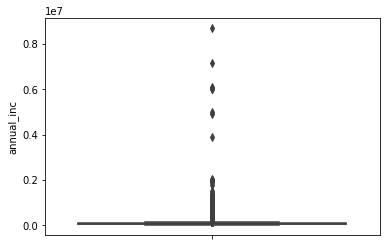

In [54]:
sns.boxplot(y=loanDF['annual_inc'])

In [55]:
loanDF.sort_values(by=['annual_inc'],ascending=False)

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
866973     8000.0     0     13.66       272.11          10               0   
177182    14825.0     0     13.11       500.30          10               0   
169235    30000.0     0     12.12       998.15          10               0   
675609     4475.0     0      7.89       140.01          10               0   
30176      5000.0     0     12.73       167.84          10               0   
180080    35000.0     0     15.31      1218.61          10               0   
306811    15600.0     0      7.69       486.62           8               0   
29708     25000.0     1     10.62       334.08           3               0   
39158      8450.0     0     12.29       281.84           0               1   
461868    35000.0     0     14.47      1204.23           5               0   
168420    35000.0     1     15.80       847.42           5               0   
278490    17600.0     0     10.99       576.12           2               1   
23618      1500.0     0      6.17        45.75           5               0   
815778    28000.0     0      6.92       863.54           6               2   
7268      12025.0     0     14.27       412.57          10               1   
833073     9600.0     0     13.33       324.99          10               2   
40529     25000.0     0     19.79       926.37          10               0   
34373      6600.0     0      7.74       206.05           9               0   
176701    18000.0     0     13.11       607.45           7               0   
145394    35000.0     0     17.27      1252.56           5               0   
184565    20000.0     0      8.90       635.07           3               0   
215956    33000.0     0      7.62      1028.33          10               0   
170925    21250.0     0      8.90       674.76          10               0   
33501     10000.0     0      7.74       312.19           1               0   
178702    30000.0     0     11.14       984.16           6               2   
21477     10000.0     0      6.54       306.68          10               2   
24233     25000.0     1     15.20       597.38          10               1   
197937    35000.0     0     12.12      1164.51           5               0   
25831     12000.0     0      7.51       373.33           1               0   
27633      5600.0     1     13.61       129.18          10               0   
...           ...   ...       ...          ...         ...             ...   
34185      3250.0     0      8.59       102.74           0               1   
4275       1300.0     0      6.03        39.57           3               2   
29586      1000.0     1     15.70        24.16           7               1   
42528      2000.0     0      9.96        64.50           0               1   
47480      1400.0     0     22.40        53.76          -1               1   
34548      1600.0     0     14.61        55.17           1               2   
306282     1600.0     0      7.69        49.91           0               1   
41920      1200.0     0     14.82        41.50           0               2   
15564      1050.0     0      6.99        32.42           0               1   
41231      2500.0     0     16.00        87.90           1               1   
36842      1000.0     0      9.63        32.10           0               1   
42283       600.0     0     11.54        19.80           0               1   
39548      1000.0     0      9.64        32.10           0               1   
214186     2125.0     0     13.11        71.72           3               2   
35920      1400.0     0     12.84        47.07           0               2   
39876      1100.0     1     13.72        25.44           0               1   
36708      2400.0     0     16.00        84.38           0               1   
228982     1000.0     1     16.77        24.73          -1               1   
227329     1000.0     1     22.35        27.82          -1               2   
34337      1200.0     0     14

Looking back at the csv files in excel for descriptions, there are quite a few borrowers noting that their annual income is misinformation. Since it is very difficult to correctly know who misinformed their annual income especially there are alot without description. What I will do is to remove annual income **extreme** outliers.

In [56]:
Q1 = loanDF['annual_inc'].quantile(0.25)
Q3 = loanDF['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

#temp = loanDF[~((loanDF['annual_inc'] <(Q1-3*IQR)) | (loanDF['annual_inc'] > (Q3+3*IQR)))]
#temp.sort_values(by=['annual_inc'],ascending=False)

loanDF = loanDF[~((loanDF['annual_inc'] <(Q1-3*IQR)) | (loanDF['annual_inc'] > (Q3+3*IQR)))]
loanDF.sort_values(by=['annual_inc'],ascending=False)

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
39738      6500.0     1      1.30       225.37           9               0   
177999    20000.0     0      7.90       625.81           2               0   
377537    35000.0     0     16.29      1235.52          10               0   
225219    35000.0     1     12.12       780.68           2               0   
50791     35000.0     0     14.98      1212.95          10               0   
189502    35000.0     1     22.95       985.67           2               0   
163968    25000.0     0      7.90       782.26           3               0   
222025    24000.0     1     20.50       642.55           5               0   
200858    35000.0     0     13.11      1181.15           4               0   
381408    25000.0     1     16.99       621.18           3               0   
58332     35000.0     1     19.20       911.78          10               0   
401422    25000.0     0     15.31       870.44          10               0   
444409    35000.0     0     12.85      1176.77           5               0   
192429    35000.0     0     17.27      1252.56           8               0   
84086     24375.0     1     19.52       639.30          10               0   
429331     8000.0     0      9.67       256.90           5               1   
74346     35000.0     1     16.20       854.86           3               0   
207913     8000.0     0     18.49       291.19           6               0   
716968    24000.0     1      7.89       485.38           6               0   
232271    28000.0     0      6.99       864.44           6               0   
127525    16000.0     0     27.70       491.26          10               0   
122156    28000.0     0      8.90       889.09           7               0   
436585    32000.0     0     18.25      1160.90          10               0   
41210     22000.0     0     17.58       790.73          10               0   
436589    30000.0     0     14.64      1034.68           2               1   
140253    35000.0     0     21.98      1336.31           2               1   
438099    21000.0     1     20.49       562.12          10               0   
225983    19200.0     0      8.90       609.67           0               0   
149364    35000.0     0     11.14      1148.18           8               0   
109206    25000.0     0     17.56       898.31          -1               0   
...           ...   ...       ...          ...         ...             ...   
42528      2000.0     0      9.96        64.50           0               1   
34185      3250.0     0      8.59       102.74           0               1   
29586      1000.0     1     15.70        24.16           7               1   
4275       1300.0     0      6.03        39.57           3               2   
41920      1200.0     0     14.82        41.50           0               2   
34548      1600.0     0     14.61        55.17           1               2   
306282     1600.0     0      7.69        49.91           0               1   
47480      1400.0     0     22.40        53.76          -1               1   
15564      1050.0     0      6.99        32.42           0               1   
41231      2500.0     0     16.00        87.90           1               1   
36842      1000.0     0      9.63        32.10           0               1   
39548      1000.0     0      9.64        32.10           0               1   
214186     2125.0     0     13.11        71.72           3               2   
42283       600.0     0     11.54        19.80           0               1   
35920      1400.0     0     12.84        47.07           0               2   
29636      2000.0     1     10.62        43.11          -1               2   
39876      1100.0     1     13.72        25.44           0               1   
227329     1000.0     1     22.35        27.82          -1               2   
36708      2400.0     0     16.00        84.38           0               1   
34337      1200.0     0     14

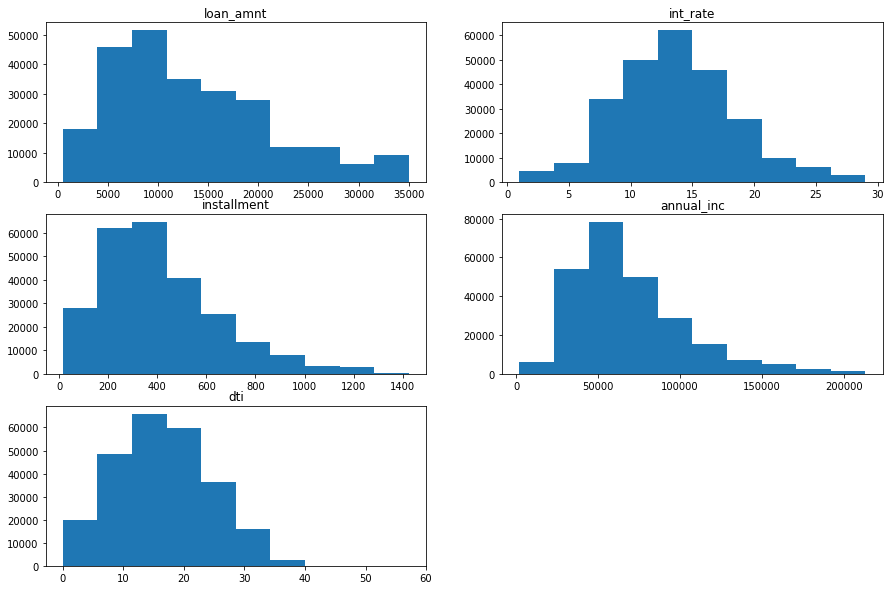

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize =[15,10])
fig.delaxes(axes[2,1]) 
ax0, ax1, ax2, ax3, ax4, ax5= axes.flatten()

ax0.hist(loanDF['loan_amnt'], histtype='bar')
ax0.set_title('loan_amnt')

ax1.hist(loanDF['int_rate'], histtype='bar')
ax1.set_title('int_rate')

ax2.hist(loanDF['installment'], histtype='bar')
ax2.set_title('installment')

ax3.hist(loanDF['annual_inc'], histtype='bar')
ax3.set_title('annual_inc')

ax4.hist(loanDF['dti'], histtype='bar')
ax4.set_title('dti')


plt.show()

Looks great but many are skewed to the right, let's perform log transformation.

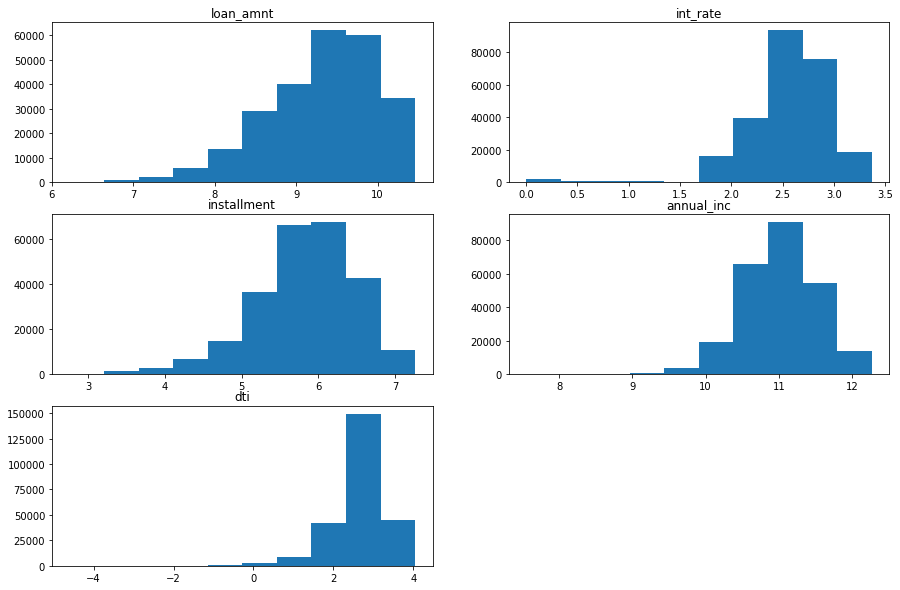

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize =[15,10])
fig.delaxes(axes[2,1]) 
ax0, ax1, ax2, ax3, ax4, ax5= axes.flatten()

ax0.hist(loanDF['loan_amnt'].apply(np.log), histtype='bar')
ax0.set_title('loan_amnt')

ax1.hist(loanDF['int_rate'].apply(np.log), histtype='bar')
ax1.set_title('int_rate')

ax2.hist(loanDF['installment'].apply(np.log), histtype='bar')
ax2.set_title('installment')

ax3.hist(loanDF['annual_inc'].apply(np.log), histtype='bar')
ax3.set_title('annual_inc')

ax4.hist(loanDF['dti'].apply(np.log), histtype='bar')
ax4.set_title('dti')


plt.show()

Looks better.

In [217]:
loanDF['loan_amnt'] = loanDF['loan_amnt'].apply(np.log)
loanDF['int_rate'] = loanDF['int_rate'].apply(np.log)
loanDF['installment'] = loanDF['installment'].apply(np.log)
loanDF['annual_inc'] = loanDF['annual_inc'].apply(np.log)
loanDF['dti'] = loanDF['dti'].apply(np.log)

display(loanDF)

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
0        8.517193     0  2.365560     5.092952          10               1   
1        7.824046     1  2.725890     4.091507           0               1   
2        7.783224     0  2.770086     4.434738          10               1   
3        9.210340     0  2.601949     5.826914          10               1   
5        8.517193     0  2.066863     5.052800           3               1   
7        8.006368     0  2.925310     4.695285           9               1   
8        8.630522     1  0.405465     5.026443           4               2   
9        8.589514     1  2.540814     4.799503           0               1   
10       8.779557     1  2.684440     5.033375           5               2   
11       9.392662     0  2.540814     5.997794          10               2   
12       9.104980     0  2.601949     5.721557           0               1   
13       8.006368     0  2.293544     4.571407           3               1   
14       9.210340     0  2.365560     5.786100           3               1   
15       6.907755     0  2.790551     3.564166           0               1   
16       9.210340     0  2.725890     5.852145           4               1   
17       8.188689     0  1.796747     4.696564          10               0   
18       8.699515     0  2.460443     5.290588           1               0   
19       9.126959     0  1.796747     5.634825           6               1   
20       9.915910     1  2.725890     6.183386           3               1   
21       9.952278     0  2.519308     6.553549          10               1   
22       9.210340     0  2.460443     5.801393          10               2   
23       9.210340     0  2.460443     5.801393           5               1   
24       8.699515     0  2.460443     5.290588           1               1   
25       9.615805     0  2.293544     6.180803           2               0   
26       9.615805     0  2.658159     6.243468           9               1   
27       8.517193     1  2.819592     4.817455           2               1   
28       8.294050     0  2.460443     4.885148          10               0   
29       9.047821     0  2.460443     5.638888           0               1   
30       8.383662     0  2.016235     4.913463           7               0   
31      10.368007     0  2.066863     6.903567           5               0   
...           ...   ...       ...          ...         ...             ...   
887158   8.853665     0  2.614472     5.472649          10               1   
887159  10.198021     1  3.251537     6.686123          10               0   
887164  10.085809     0  1.870263     6.600510           0               0   
887177  10.121619     1  3.251537     6.609713           1               1   
887178  10.184900     0  3.177637     6.946534           8               0   
887185  10.085809     1  2.771964     6.369062          10               0   
887187   9.615805     1  2.516890     5.819014           3               0   
887189   9.903488     0  2.707383     6.541333          10               2   
887193   9.323669     1  2.995232     5.692620           3               1   
887198  10.308953     0  2.707383     6.946803          10               0   
887202   9.392662     0  2.484073     5.987758           1               1   
887215   9.459152     0  2.841415     6.127197           6               0   
887249  10.227381     1  3.090588     6.637926           0               1   
887254   8.881836     0  2.707383     5.519699           5               0   
887264   9.903488     0  2.564180     6.512918          10               0   
887268   9.903488     0  2.707383     6.541333          10               0   
887275  10.298060     1  2.614472     6.529813          10               2   
887279   8.678461     0  2.802754     5.337442           5               2   
887290  10.463103     1  0.182322     6.934495           8               0   
887303   9.392662     0  2.882

In [61]:
perc = loanDF['loan_status'].value_counts()

print("Percentage of charged off loans: ",perc[0]/perc[1]*100,"%")

Percentage of charged off loans:  22.065449197205538 %


Before training our dataset, we have to know that it is imbalanced.

## Modeling
### Extreme Gradient Boosting (XGBoost) using 10-Fold Cross Validation
I am going to use XGBoost for training this dataset because it is a great algorithm to train imbalanced dataset.

In [62]:
labels = np.array(loanDF['loan_status'])

#backup dataframe
cleanLoanDF = loanDF

#remove target variable
loanDF = loanDF.drop('loan_status',axis = 1)

loanDFLists = list(loanDF.columns)

In [63]:
loanDF.head()

loan_amnt  term  int_rate  installment  emp_length  home_ownership  \
0     5000.0     0     10.65       162.87          10               1   
1     2500.0     1     15.27        59.83           0               1   
2     2400.0     0     15.96        84.33          10               1   
3    10000.0     0     13.49       339.31          10               1   
5     5000.0     0      7.90       156.46           3               1   

   annual_inc  verification_status  purpose    dti  
0     24000.0                    0        1  27.65  
1     30000.0                    2        6   1.00  
2     12252.0                    1        5   8.72  
3     49200.0                    2        3  20.00  
5     36000.0                    2        9  11.20

In [64]:
#from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
#trainLoanDF, testLoanDF, trainLabels, testLabels = train_test_split(loanDF, labels, test_size = 0.3,random_state = 42)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=12, ratio = 1.0)
trainLoanDF_res, trainLabels_res = sm.fit_sample(loanDF, labels)

trainLoanDF, testLoanDF, trainLabels, testLabels = train_test_split(trainLoanDF_res, trainLabels_res,
                                                  test_size = 0.3,
                                                  random_state=12)

evalSet=[(testLoanDF, testLabels)]

In [ ]:
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=5, 
    gamma=10, 
    n_estimators=1000)

clf.fit(trainLoanDF, trainLabels, early_stopping_rounds=20, eval_metric=["auc","error"], eval_set=evalSet, verbose=False)

targetPred = clf.predict(testLoanDF)
#fileName = 'FS_'

In [224]:
accuracy = accuracy_score(np.array(testLabels).flatten(), targetPred)
accuracy_per_roc_auc = roc_auc_score(np.array(testLabels).flatten(), targetPred)
print("Accuracy: %.2f%%\nROC-AUC: %.2f%%" % (accuracy * 100.0,accuracy_per_roc_auc * 100))


Accuracy: 88.44%
ROC-AUC: 88.43%


Impressive ROC-AUC and accuracy with both almost reaching 90%

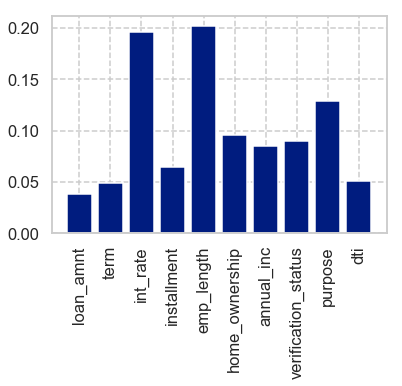

In [218]:
plt.bar(loanDFLists, clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

It seems that top 3 most important features are interest rate, employment length and purpose of loans.

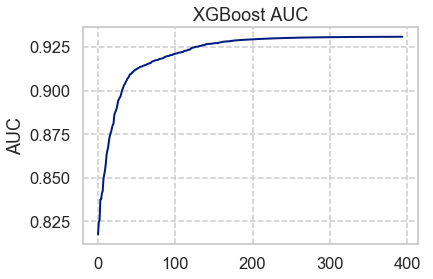

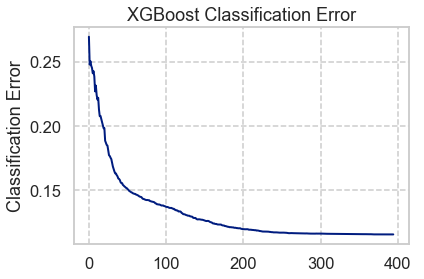

In [225]:
from matplotlib import pyplot

results = clf.evals_result()

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

#plot accuracy
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'])
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

#plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'])
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

Looks awesome. Let's evaluate this model furthermore with 10-Fold Cross Validation.

### 10-Fold CV on XGBoost Model

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#CV model
model = xgboost.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=5, 
    gamma=10, 
    n_estimators=1000)

kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, trainLoanDF_res, trainLabels_res, cv=kfold)

In [78]:
for i in range(len(results)):
    print("k=", i+1, ", Accuracy:%.2f%%" % (results[i]*100))
    
print("Mean accuracy: %.2f%%, Standard Deviation: %.2f%%" % (results.mean()*100, results.std()*100))



k= 1 , Accuracy:84.09%
k= 2 , Accuracy:78.83%
k= 3 , Accuracy:80.95%
k= 4 , Accuracy:83.21%
k= 5 , Accuracy:79.28%
k= 6 , Accuracy:83.26%
k= 7 , Accuracy:97.02%
k= 8 , Accuracy:98.36%
k= 9 , Accuracy:98.27%
k= 10 , Accuracy:98.43%
Mean accuracy: 88.17%, Standard Deviation: 8.21%


The results were impressive! 88.17% average accuracy at only 8.21% standard deviation. Highest accuracy achieved is at an impressive 98.43%! Let's try other algorithms.

## Random Forest using Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, 
                            criterion='gini', 
                            random_state=0)

maxFeatures = range(1,cleanLoanDF.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=5, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=loanDF.values
y=cleanLoanDF['loan_status'].values
rand.fit(X,y)
mean_scores = [result.mean_validation_score for result in rand.cv_results_]
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)

In [176]:
print(rand.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [120]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("")

report(rand.cv_results_)

Rank: 1
Mean validation score: 0.791 (std: 0.007)

Rank: 2
Mean validation score: 0.788 (std: 0.008)

Rank: 3
Mean validation score: 0.787 (std: 0.009)



In [227]:
import sklearn.metrics 

randomForestRCV = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForestRCV.fit(trainLoanDF,trainLabels)
rfRCVPredict = randomForestRCV.predict(testLoanDF)
rfRCVPredictproba = randomForestRCV.predict_proba(testLoanDF)[:,1] #for ROC curve
rfRCVAccuracy = accuracy_score(testLabels,rfRCVPredict)
roc_score = roc_auc_score(testLabels,rfRCVPredict)
print("Accuracy:%.2f%%\nROC:%.2f%%" % (rfRCVAccuracy*100, roc_score*100))

C:\Users\LewisWong\Anaconda3\envs\ds\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:84.61%
ROC:84.61%


Text(0,0.5,'Normalized Gini Importance')

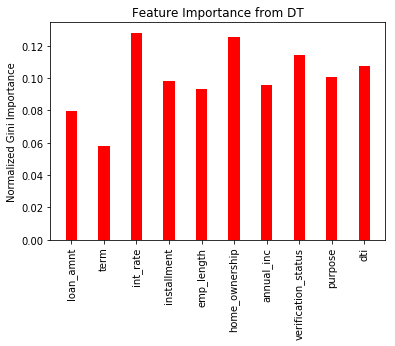

In [173]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(loanDFLists)), randomForestRCV.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForestRCV.feature_importances_)))
ax.set_xticklabels(loanDFLists,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

## ROC Plot function

In [190]:
import seaborn as sns
import sklearn.metrics as sk

sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = sk.roc_curve(truth,pred)
    roc_auc = auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

## Confusion Matrix Plot function

In [194]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): 
    cm = confusion_matrix(testLabels, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

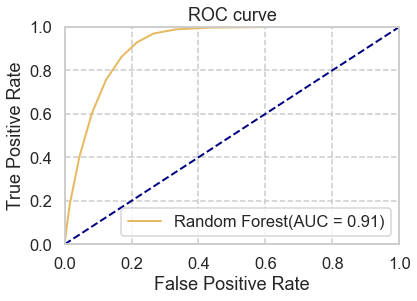

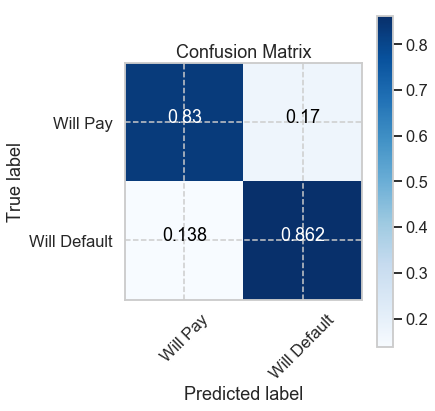

In [228]:
plotAUC(testLabels,rfRCVPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfRCVPredict, normalize=True)
plt.show()

Excellent TP and TN probability!

## Random Forest using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)


In [129]:
report(grid_search.cv_results_)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 0.819 (std: 0.000)

Rank: 1
Mean validation score: 

In [177]:
print(grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [229]:
randomForestGCV = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=grid_search.best_estimator_.max_features,random_state=0 )
randomForestGCV.fit(trainLoanDF,trainLabels)
rfGCVPredict = randomForestGCV.predict(testLoanDF)
rfGCVPredictproba = randomForestGCV.predict_proba(testLoanDF)[:,1] #for ROC curve
rfGCVAccuracy = accuracy_score(testLabels,rfGCVPredict)
roc_score = roc_auc_score(testLabels,rfGCVPredict)
print("Accuracy:%.2f%%\nROC:%.2f%%" % (rfGCVAccuracy*100, roc_score*100))

C:\Users\LewisWong\Anaconda3\envs\ds\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:84.61%
ROC:84.61%


Text(0,0.5,'Normalized Gini Importance')

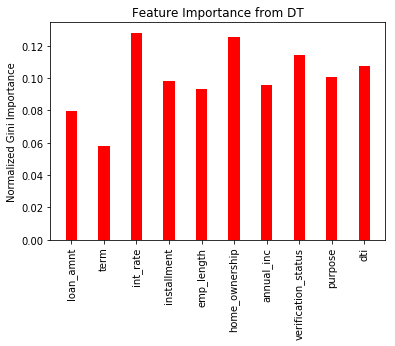

In [175]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(loanDFLists)), randomForestGCV.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForestGCV.feature_importances_)))
ax.set_xticklabels(loanDFLists,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

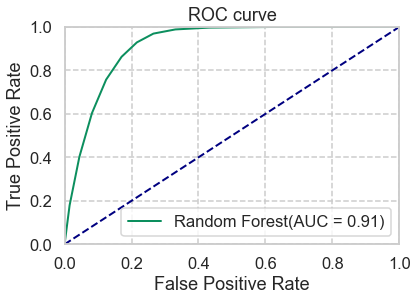

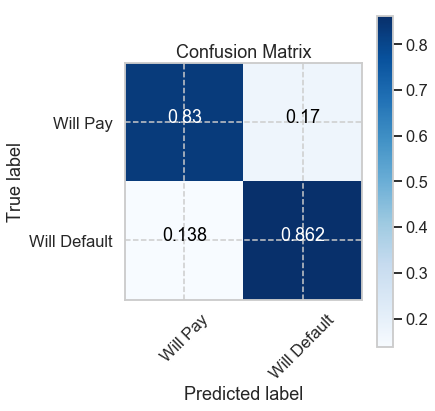

In [230]:
plotAUC(testLabels,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()

Same as above

# Results


In [236]:
from sklearn.metrics import classification_report
print("RandomForest Randomized Search CV",classification_report(testLabels, rfRCVPredict, target_names=None))
print("RandomForest Grid Search CV",classification_report(testLabels, rfGCVPredict, target_names=None))
print("XGBoost 10-Fold CV ",classification_report(testLabels, targetPred, target_names=None))

RandomForest Randomized Search CV               precision    recall  f1-score   support

           0       0.86      0.83      0.84     61122
           1       0.84      0.86      0.85     61263

   micro avg       0.85      0.85      0.85    122385
   macro avg       0.85      0.85      0.85    122385
weighted avg       0.85      0.85      0.85    122385

RandomForest Grid Search CV               precision    recall  f1-score   support

           0       0.86      0.83      0.84     61122
           1       0.84      0.86      0.85     61263

   micro avg       0.85      0.85      0.85    122385
   macro avg       0.85      0.85      0.85    122385
weighted avg       0.85      0.85      0.85    122385

XGBoost 10-Fold CV                precision    recall  f1-score   support

           0       0.99      0.78      0.87     61122
           1       0.82      0.99      0.90     61263

   micro avg       0.88      0.88      0.88    122385
   macro avg       0.90      0.88      0.88   

XGBoost has the highest F1 Score in both classification tasks. Thus, XGBoost is the most accurate and best model for this kind of dataset.

## TODO
  - Create a story to tell business what other insights can be found from this analysis.
  - For example, the feature importance chart at XGBoost shows highest weight for employment length, maybe we can look deeper into it and plot a correlation chart between employment length and loan status.